# **Portefeuille 2**
**Nous allons Utiliser le Model MEDAF(CAPM) pour Analyser les Actifs du SP500 ci-dessous:**
- Truist Bank
- Bancorp Bank
- Citigroup

In [88]:
# Importation des librairies

import datetime as dt
import yfinance as yf
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np

In [89]:
#******* Premiere Importationde des données*******#
# Truist Financial Corporation (TFC), US_Bancorp(USB), Citigroup(C), S&P 500 (^GSPC)
# Indice de reference est le S&P500

assets = assets = ["TFC","USB","C","^GSPC"]
start = dt.datetime(2023, 5, 15)
end = dt.datetime(2023, 6, 14)

#start = dt.datetime.today() - dt.timedelta(31)
#end = dt.datetime.today()

# Assets correspond aux actifs dont nous souhaitons importer les modalités et paramettres.
# start et end renvoient au nombre de jours de cotation aucour d'un mois tout en excluant les weekends ou la bourse est fermé.  (24 jours du mois en arriere a compter d'hier)
# le choix de 24 correspond a 1 mois de données.


# Boucle pour lire les differentes modalités de chacunes de nos variables ou actifs financier et stocker dans l'objet price
for price in assets:
    price = yf.download(price,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [90]:
# Affichage de la Boucle avec les differentes modalités
price

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-15,4126.649902,4141.250000,4110.270020,4136.279785,4136.279785,3562170000
2023-05-16,4127.950195,4135.540039,4109.859863,4109.899902,4109.899902,3654200000
2023-05-17,4122.850098,4164.669922,4113.620117,4158.770020,4158.770020,4039080000
2023-05-18,4157.680176,4202.200195,4153.500000,4198.049805,4198.049805,3980500000
2023-05-19,4204.149902,4212.910156,4180.200195,4191.979980,4191.979980,4041900000
2023-05-22,4190.779785,4209.220215,4179.680176,4192.629883,4192.629883,3728520000
2023-05-23,4176.799805,4185.680176,4142.540039,4145.580078,4145.580078,4155320000
2023-05-24,4132.959961,4132.959961,4103.979980,4115.240234,4115.240234,3739160000
2023-05-25,4155.709961,4165.740234,4129.729980,4151.279785,4151.279785,4147760000


Nous allons maintenant procéder à un petit traitement des données.
Trions les prix de clôture ajustés par tickers :

In [91]:
# Creation et affichage de la Dataframe qui vas stocker les modalités (prix) des differentes variables (actifs)
p_close = pd.DataFrame()

# Boucle qui permet de stoker la modalité Prix de fermeture Ajuster (Adj Close) de tout les differentes variables dans notre dataFrame P_close
for price in assets:
    p_close[price] = yf.download(price,start,end)["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [92]:
#Affichage des Prix de fermeture Ajuster (Adj Close)
p_close

,TFC,USB,C,^GSPC
Date,,,,
2023-05-15,27.870001,29.650000,46.049999,4136.279785
2023-05-16,27.170000,28.680000,45.279999,4109.899902
2023-05-17,28.920000,30.450001,47.080002,4158.770020
2023-05-18,29.840000,30.490000,46.389999,4198.049805
2023-05-19,29.700001,30.110001,45.709999,4191.979980
2023-05-22,30.580000,30.910000,45.790001,4192.629883
2023-05-23,30.750000,31.139999,45.910000,4145.580078
2023-05-24,30.400000,30.809999,44.490002,4115.240234
2023-05-25,30.530001,30.510000,44.230000,4151.279785


## Traitement de la donnée Collecter


In [93]:
# Affichage de la DataFrame (Head, Tail) Uniquement avec les Prix de clotures des actifs (variables)
p_close.head()


,TFC,USB,C,^GSPC
Date,,,,
2023-05-15,27.870001,29.650000,46.049999,4136.279785
2023-05-16,27.170000,28.680000,45.279999,4109.899902
2023-05-17,28.920000,30.450001,47.080002,4158.770020
2023-05-18,29.840000,30.490000,46.389999,4198.049805
2023-05-19,29.700001,30.110001,45.709999,4191.979980


In [94]:
# Affichage de la DataFrame (Head, Tail) Uniquement avec les Prix de clotures des actifs (variables)
p_close.tail()

# On remarque également que les valeurs du tails de chacunes des variables sont plus élevés par rapports aux valeurs du Head: (il ya croissance)

,TFC,USB,C,^GSPC
Date,,,,
2023-06-07,33.480000,33.259998,48.009998,4267.520020
2023-06-08,33.150002,33.060001,48.099998,4293.930176
2023-06-09,32.630001,32.860001,48.299999,4298.859863
2023-06-12,31.950001,32.160000,48.450001,4338.930176
2023-06-13,32.400002,32.700001,48.689999,4369.009766


In [95]:
# Estimation de la quantité de valeurs manquantes sur chaques variables de toute la dataframe
p_close.isnull().sum()

# Pas de valeurs Manquantes(NAN) dans notre jeux de Données


TFC      0
USB      0
C        0
^GSPC    0
dtype: int64

In [96]:
# En cas de presence de Valeurs Manquante dans le Jeux de Données Avenir
# Remplacement de ces Valeurs Manquantes (NAN) pourrai se faire suivant l'une des 3 Methodes
#(ous avons 3 méthodes

#----------# remplacer tous les NAN par la premiere valeur non NAN avec la synthaxe:
           #p_close[price].fillna(method='bfill')

#----------# supprimmer les lignes ou colones qui contienent les NAN
           #p_close[price].dropna(axis = 0, how = 'any')

#----------# Remplacer les NAN par zero(0) car il n'aura aucun effet sur les données et calculs.
           # une première synthaxe est : new var = np.where(np.isnan(old_var), 0, old_var)

# CONCATENATION  et affichage de la dataFrame sur lequel nous avons remplacer les NAN par Zero (NAN = 0)
close_p = p_close.fillna(0)
close_p.head()

,TFC,USB,C,^GSPC
Date,,,,
2023-05-15,27.870001,29.650000,46.049999,4136.279785
2023-05-16,27.170000,28.680000,45.279999,4109.899902
2023-05-17,28.920000,30.450001,47.080002,4158.770020
2023-05-18,29.840000,30.490000,46.389999,4198.049805
2023-05-19,29.700001,30.110001,45.709999,4191.979980


In [97]:
#Statistique Descriptive de Notre jeux de Données
close_p.describe()

,TFC,USB,C,^GSPC
count,21.000000,21.000000,21.000000,21.000000
mean,30.926667,31.149048,46.224762,4219.990002
std,1.660182,1.232095,1.462411,73.932041
min,27.170000,28.680000,44.230000,4109.899902
25%,30.400000,30.490000,44.840000,4158.770020
50%,30.750000,30.809999,46.049999,4205.450195
75%,32.080002,32.160000,47.220001,4282.370117
max,33.480000,33.259998,48.689999,4369.009766


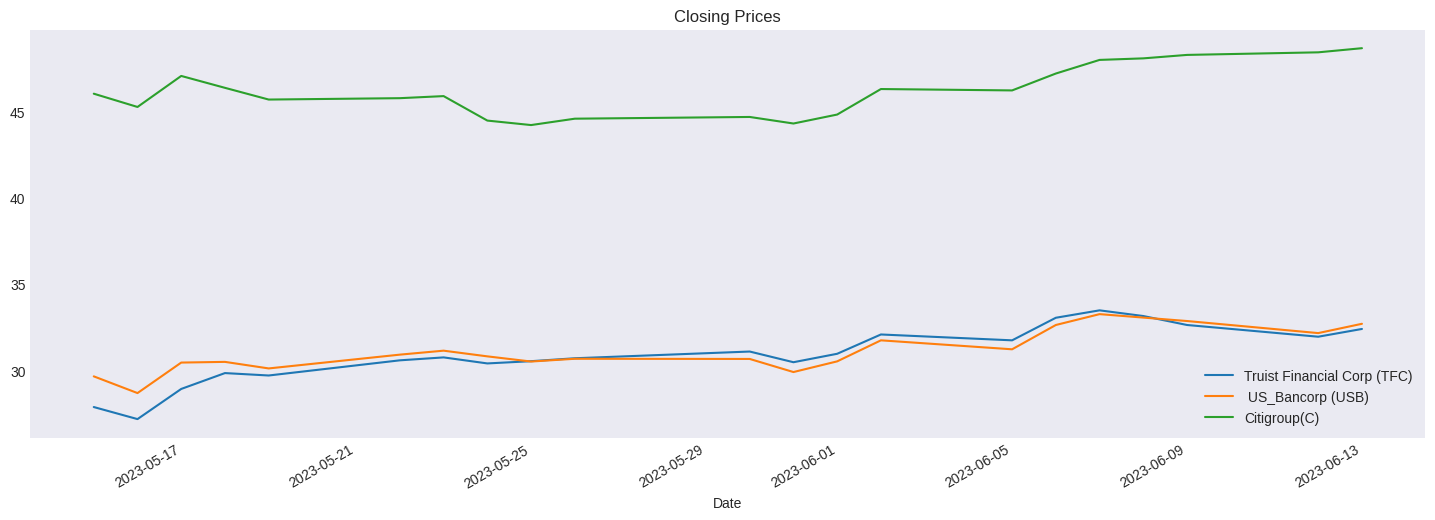

In [98]:
# premier Plot de la Tendance sur lequel nous avons exclu le SP500

close_p['TFC'].plot(label= 'Truist Financial Corp (TFC)', figsize=(18,6), title = 'Closing Prices')
close_p['USB'].plot(label= ' US_Bancorp (USB)')
close_p['C'].plot(label= 'Citigroup(C)')
plt.legend();

# Une Interprétation du graphique ci-dessus est la suivante :
# tous ces actifs connaissent une croissance significative avec des prix qui évoluent significativement à la hausse.
#-	L’actif avec la plus grande variation et prix est CityGroup BAS de couleur Verte
# Truist Financial Corp (TFC) est fortement correlé a US_Bancorp (USB)


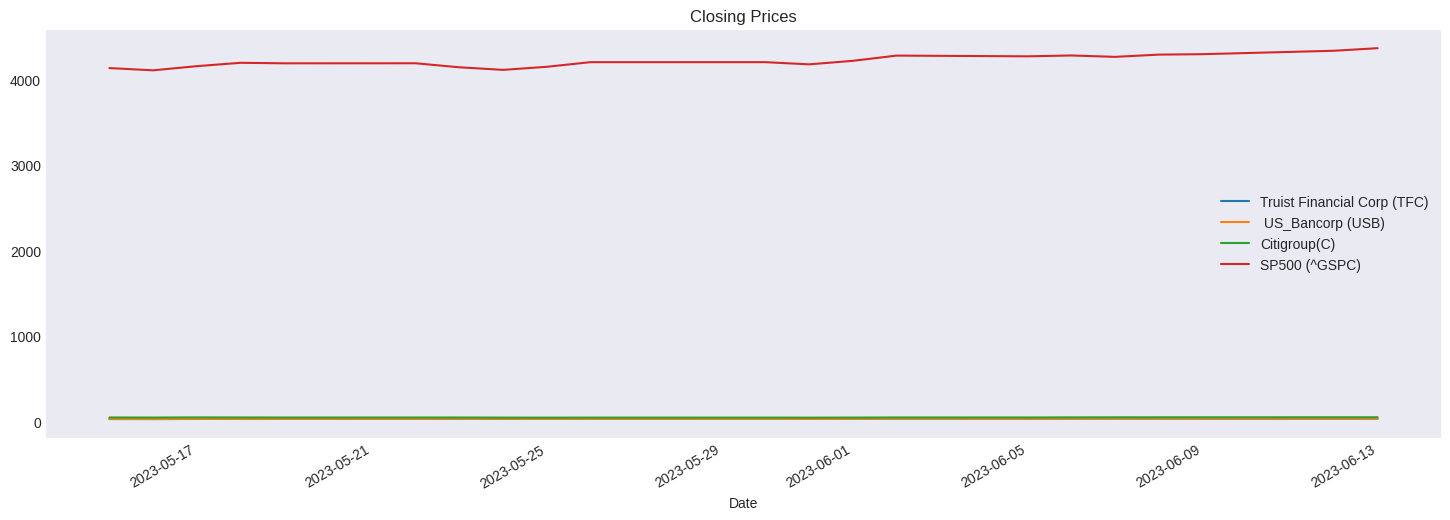

In [99]:
# Deuxieme Plot de la Tendance avec le SP500

close_p['TFC'].plot(label= 'Truist Financial Corp (TFC)', figsize=(18,6), title = 'Closing Prices')
close_p['USB'].plot(label= ' US_Bancorp (USB)')
close_p['C'].plot(label= 'Citigroup(C)')
close_p['^GSPC'].plot(label= 'SP500 (^GSPC)')
plt.legend();

# Une Interprétation du graphique ci-dessus est la suivante :
# on distingue pas assez la nature de nos graphique pour interpreter.
# cela est du a la grande difference de prix entre l'indice (7000) et les autres actif (entre 0 et 100) soit une difference de 6900

ESTIMATION DES RENDEMENTS

In [100]:
# Etapes de Calcul du Rendement Moyen
# cree une coleonne pour le rendement de chaque actif
# utiliser la formule et appliqué la methode shift
# on peut aussi utiliser la fonction "pct.change" de pandas

Return_TFC = (close_p['TFC']/close_p['TFC'].shift(1))-1
Return_USB = (close_p['USB']/close_p['USB'].shift(1))-1
Return_C = (close_p['C']/close_p['C'].shift(1))-1
Return_SP500 = (close_p['^GSPC']/close_p['^GSPC'].shift(1))-1

Return_TFC, Return_USB, Return_C , Return_SP500
# Ce rendement est positif lorque le prix de l’actif coture à la hausse et négatif s’il cloture plutot à la baisse

(Date
 2023-05-15         NaN
 2023-05-16   -0.025117
 2023-05-17    0.064409
 2023-05-18    0.031812
 2023-05-19   -0.004692
 2023-05-22    0.029630
 2023-05-23    0.005559
 2023-05-24   -0.011382
 2023-05-25    0.004276
 2023-05-26    0.005568
 2023-05-30    0.012704
 2023-05-31   -0.019942
 2023-06-01    0.016081
 2023-06-02    0.036176
 2023-06-05   -0.010599
 2023-06-06    0.041273
 2023-06-07    0.013011
 2023-06-08   -0.009857
 2023-06-09   -0.015686
 2023-06-12   -0.020840
 2023-06-13    0.014085
 Name: TFC, dtype: float64,
 Date
 2023-05-15         NaN
 2023-05-16   -0.032715
 2023-05-17    0.061715
 2023-05-18    0.001314
 2023-05-19   -0.012463
 2023-05-22    0.026569
 2023-05-23    0.007441
 2023-05-24   -0.010597
 2023-05-25   -0.009737
 2023-05-26    0.005244
 2023-05-30   -0.000326
 2023-05-31   -0.024788
 2023-06-01    0.020736
 2023-06-02    0.039974
 2023-06-05   -0.016383
 2023-06-06    0.045163
 2023-06-07    0.019307
 2023-06-08   -0.006013
 2023-06-09   -0.006050


In [101]:
## Calcul de la Covariance

cov_TFC = Return_TFC.cov(Return_SP500)
cov_USB = Return_USB.cov(Return_SP500)
cov_C = Return_C.cov(Return_SP500)

cov_TFC, cov_USB, cov_C

(8.606879681525765e-05, 8.119409138351359e-05, 6.695148744428883e-05)

In [102]:
## Calcul de la variance du CAC40 (rendement du marché )
var_SP500 = Return_SP500.var()
var_SP500

5.7418522114683985e-05

In [103]:
## Calcul du beta de chacun des actifs = cov/variance du marché
B_TFC = cov_TFC/var_SP500
B_USB = cov_USB/var_SP500
B_C = cov_C/var_SP500

B_TFC , B_USB , B_C

(1.4989726946184627, 1.414074908116615, 1.1660259612841364)

In [104]:
# le taux sans risque (Tsr) au USA est de 4.83%(0.048) peut nous servir de référence dans les calculs
# supposons que l'on espere un rendement de 10%, soit Re = 0.1
# Le retour sur investissement selon le CAPM se calcul comme suite:
# Ri = Tsr + beta (Re-Tsr)

Ri_TFC = 0.048 + B_TFC*(0.1 - 0.048)
Ri_USB =  0.048 + B_USB*(0.1 - 0.048)
Ri_C = 0.048 + B_C*(0.1 - 0.048)

Ri_TFC*100, Ri_USB*100, Ri_C*100

(12.594658012016009, 12.1531895222064, 10.863334998677509)

# Interpretation:

Ainsi, le retour sur investissment espéré est de:
*  10,86 %  pour l'action Citigroup(C).
*  12,15 %  pour  US_Bancorp(USB),
*  12,59 %  pour Truist Financial Corporation (TFC),

ETUDE  DE LA VOLATILITE

In [105]:
# Creation de la Dataframe qui vas stocker le volume des differents actifs
p_volatility = pd.DataFrame()

In [106]:
# Boucle qui permet d'enregistrer le volume de chaque actif dans une dataFrame
for price in assets:
    p_volatility[price] = yf.download(price,start,end)["Volume"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [107]:
#Affichage des premieres valeurs
p_volatility.head()

,TFC,USB,C,^GSPC
Date,,,,
2023-05-15,11183800,12671600,11911300,3562170000
2023-05-16,11692100,14997200,9201200,3654200000
2023-05-17,18087200,22429700,16359100,4039080000
2023-05-18,17349200,13204600,17618000,3980500000
2023-05-19,13549100,14999500,15406400,4041900000


In [108]:
# On Fait une Concatenation tout en remplacant les NAN si elles existent ou surviennent
cl_volatility = p_volatility.fillna(0)

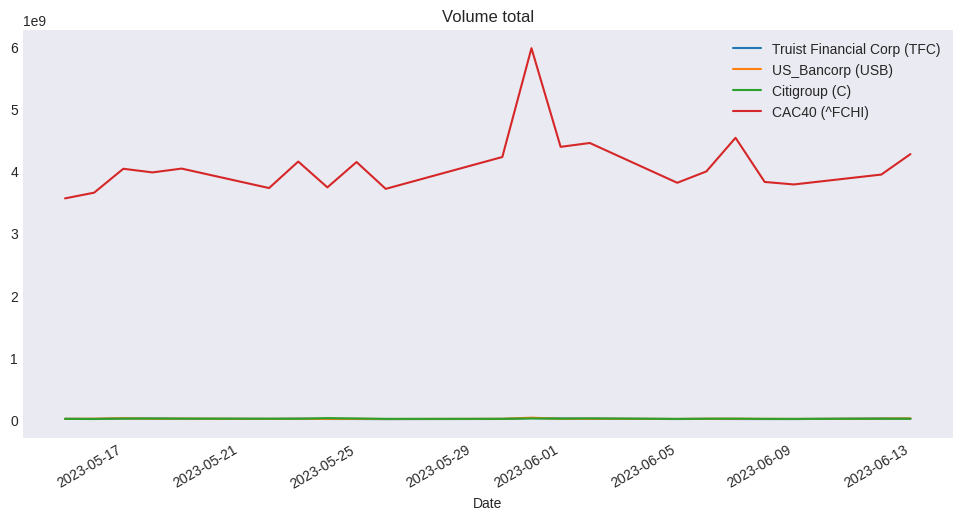

In [109]:
# On plot le volume de tous nos Actifs (Volume total)

cl_volatility['TFC'].plot(label= 'Truist Financial Corp (TFC)', figsize=(12,6), title = 'Volume total')
cl_volatility['USB'].plot(label= 'US_Bancorp (USB)')
cl_volatility['C'].plot(label= 'Citigroup (C)')
cl_volatility['^GSPC'].plot(label= 'CAC40 (^FCHI)')
plt.legend();

# Une Interprétation du graphique ci-dessus est la suivante :
# le graphique du CAC40 Domine et on distingue pas assez la nature des autres graphiques pour interpreter.
# cela est du a la grande difference de prix entre l'indice CAC40 et les autres actif


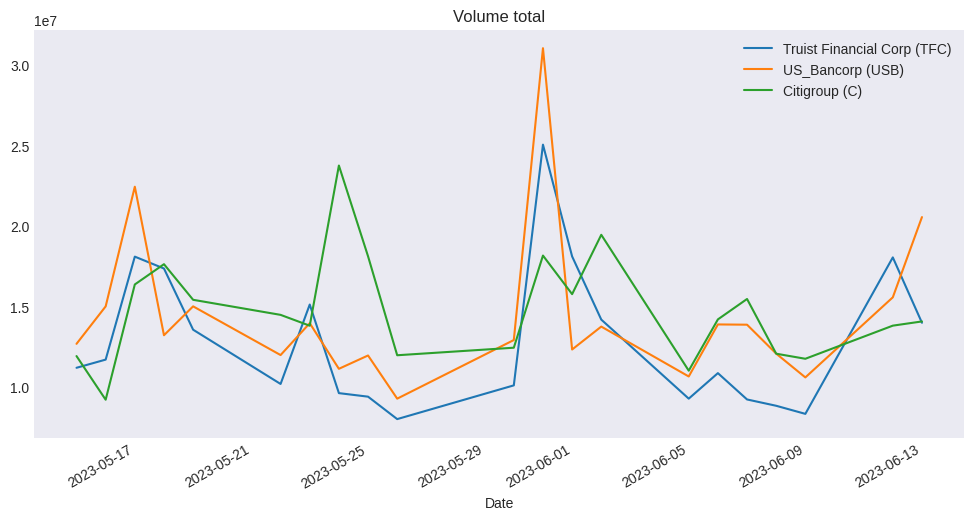

In [110]:
# On plot le volume de tous nos Actifs (Volume total)

cl_volatility['TFC'].plot(label= 'Truist Financial Corp (TFC)', figsize=(12,6), title = 'Volume total')
cl_volatility['USB'].plot(label= 'US_Bancorp (USB)')
cl_volatility['C'].plot(label= 'Citigroup (C)')
#cl_volatility['^GSPC'].plot(label= 'CAC40 (^FCHI)')

plt.legend();
# Ce plot de volumetrie nous montre que l'actif Credit Agricole possede de tres grand niveaux de volatilité

## FRONTIERE EFFICIENTE
Nous allons estimer la frontière efficiente, en faisant une simulation des combinaisons imaginaires de portefeuilles

Nous allons nous limité a 1 000 portefeuilles de combinaisons différentes.

In [111]:
# calcul des Rendements Anuuel et Journalier de notre portefeuille
returns_daily = p_close.pct_change()
returns_annual = returns_daily.mean() * 250

# calcul des Covariances Anuuel et Journalière de notre portefeuille
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

In [112]:
# lists pour stocquer le Rendement, Volatilité, Poids ou niveau de representation de l'actif dans le portefeuille(weights)

port_returns = []
port_volatility = []
stock_weights = []

# Nombres de Combinaisons de Portefeuille imaginaires
num_assets = len(assets)
num_portfolios = 10000

# Remplissage des Liste defini plus haut avec les valeurs aleatoire de Rendement, Risque et Weight
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [113]:
# Creation d'un dictionnaire pour stocker les valeurs de nos Combinaisons de Portefeuille
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

In [114]:
# Croisement de données entre dictionnaire et les valeurs weight des portefeuilles
for counter,symbol in enumerate(assets):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]

In [115]:
# Creation d'une DataFrame a partir des portefeuilles
df = pd.DataFrame(portfolio)

# Definition des Colonnes
column_order = ['Returns', 'Volatility'] + [stock+' weight' for stock in assets]

# Reorgatisation des colonnes de notre DataFrame
df = df[column_order]

#Affichage du Head
df.head()

,Returns,Volatility,TFC weight,USB weight,C weight,^GSPC weight
0,1.124667,0.284776,0.069735,0.560570,0.117855,0.251839
1,1.330457,0.325600,0.288207,0.438136,0.219501,0.054156
2,1.003547,0.258761,0.040435,0.410530,0.296868,0.252167
3,1.239060,0.266480,0.336346,0.183992,0.268744,0.210918
4,1.210355,0.290990,0.231139,0.355569,0.273961,0.139331


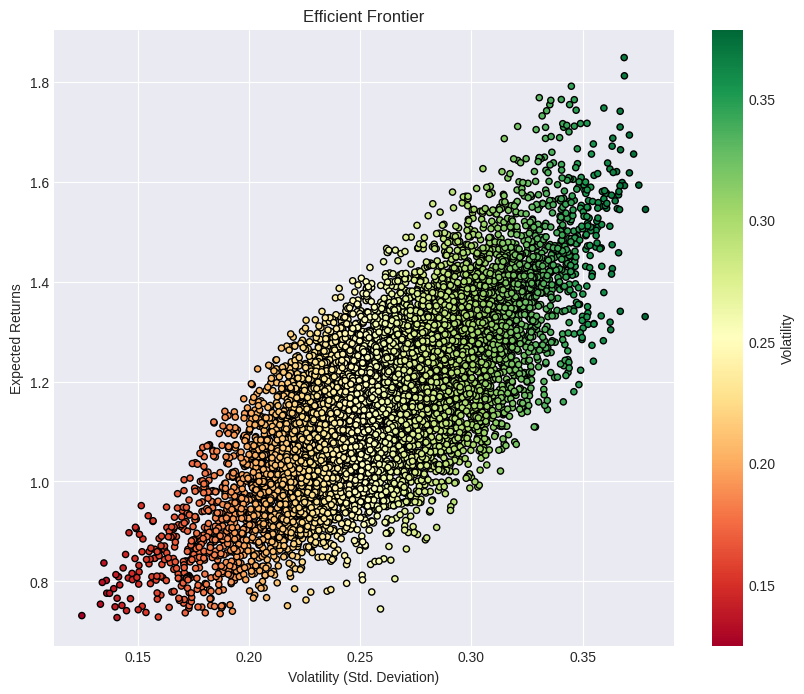

In [116]:
# Affichage du Tracé de la Frontiere Efficiente avec les Valeurs Max et Min en fonction de la Vollatilité
plt.style.use('seaborn-v0_8-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Volatility',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

Cet Image nous Montre la simulation de 10.000 portefeuilles avec différentes combinaisons d'actifs ou pondérations  qui nous ont généré différents rendements attendus et différentes volatilités attendues. Chaque point situé sur la ligne représente une combinaison optimale d'actions (Truist Financial Corp (TFC), US_Bancorp (USB), Citigroup (C))

Nous savons que ces actions maximisent le rendement attendu pour un niveau de
risque donné.

> Ce pendant, Si tous les points de la courbe de la frontière efficiente sont des combinaisons optimales, quel est le portefeuille optimal parmi les différentes combinaisons optimales ?

>  Quels seraient même les critères de choix de cette "meilleure des meilleures" combinaisons ?


> Les Reponses a ces questions se trouvent dans le Rapport Final.




